In [ ]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import time
import os

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
sample_submission = pd.read_csv('/content/sample_submission.csv')

In [ ]:
print("Checking for missing values")
print(train.isnull().sum())

Checking for missing values
id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64


In [ ]:
X = train.drop(columns=['id', 'FloodProbability'])
y = train['FloodProbability']

In [ ]:
from sklearn.impute import SimpleImputer

print(" Checking for missing values before imputation:")
print(X.isnull().sum().sum())

imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

print(" Missing values after imputation:", X_imputed.isnull().sum().sum())

 Checking for missing values before imputation:
0
 Missing values after imputation: 0


In [ ]:
from scipy.stats import zscore

z_scores = np.abs(zscore(X_imputed))
filtered_entries = (z_scores < 3).all(axis=1)
X_clean = X_imputed[filtered_entries]
y_clean = y[filtered_entries]

print(" Removed outliers. Remaining samples:", X_clean.shape[0])

 Removed outliers. Remaining samples: 1053017


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
start_time = time.time()

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_val)

In [ ]:
start_time_1 = time.time()
model_single = LinearRegression(n_jobs=1)
model_single.fit(X_train, y_train)
y_pred_single = model_single.predict(X_val)

In [ ]:
mse_single = mean_squared_error(y_val, y_pred_single)
rmse_single = np.sqrt(mse_single)
r2_single = r2_score(y_val, y_pred_single)
time_single = time.time() - start_time_1

In [ ]:
start_time_2 = time.time()
model_multi = LinearRegression(n_jobs=-1)
model_multi.fit(X_train, y_train)
y_pred_multi = model_multi.predict(X_val)

mse_multi = mean_squared_error(y_val, y_pred_multi)
rmse_multi = np.sqrt(mse_multi)
r2_multi = r2_score(y_val, y_pred_multi)
time_multi = time.time() - start_time_2


print(" Single-threaded Linear Regression:")
print(f" MSE   : {mse_single:.4f}")
print(f" RMSE  : {rmse_single:.4f}")
print(f" R²     : {r2_single:.4f}")
print(f" Time Taken: {time_single:.4f} seconds\n")

print(" Multi-threaded Linear Regression:")
print(f" MSE   : {mse_multi:.4f}")
print(f" RMSE  : {rmse_multi:.4f}")
print(f" R²     : {r2_multi:.4f}")
print(f" Time Taken: {time_multi:.4f} seconds")

 Single-threaded Linear Regression:
 MSE   : 0.0004
 RMSE  : 0.0201
 R²     : 0.8449
 Time Taken: 0.6867 seconds

 Multi-threaded Linear Regression:
 MSE   : 0.0004
 RMSE  : 0.0201
 R²     : 0.8449
 Time Taken: 0.6278 seconds


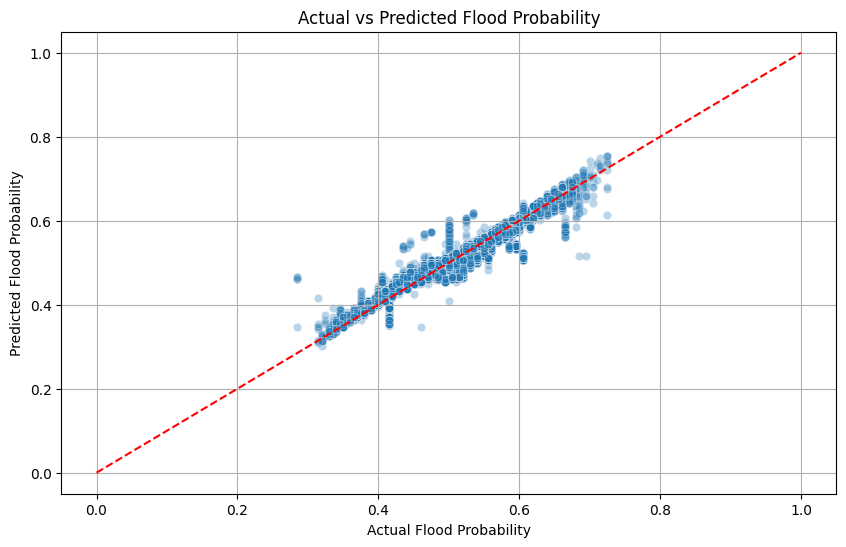

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val, y=y_pred, alpha=0.3)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('Actual Flood Probability')
plt.ylabel('Predicted Flood Probability')
plt.title('Actual vs Predicted Flood Probability')
plt.grid(True)
plt.show()

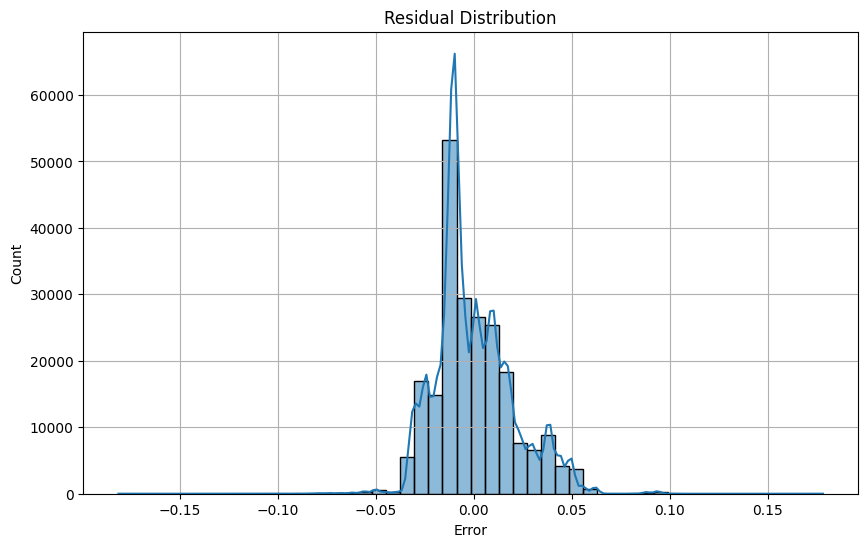

In [ ]:
plt.figure(figsize=(10, 6))
residuals = y_val - y_pred
sns.histplot(residuals, bins=50, kde=True)
plt.title('Residual Distribution')
plt.xlabel('Error')
plt.grid(True)
plt.show()

/tmp/ipython-input-19-2425407725.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Single-threaded', 'Multi-threaded'], y=[time_single, time_multi], palette='cool')


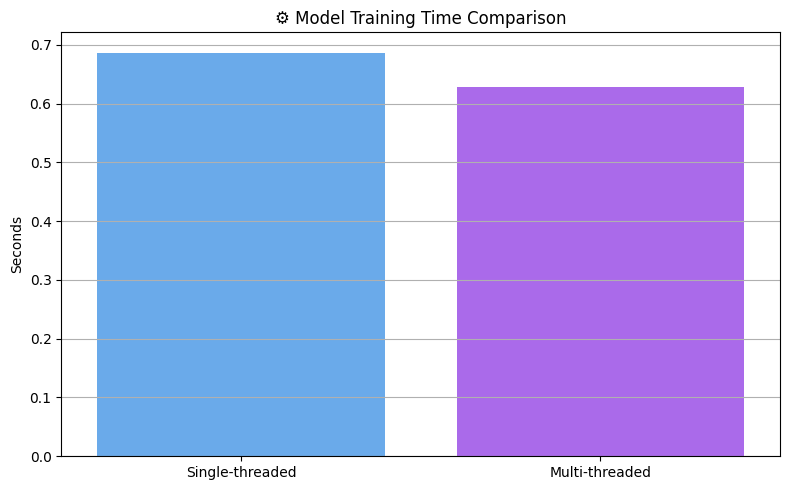

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=['Single-threaded', 'Multi-threaded'], y=[time_single, time_multi], palette='cool')
plt.title("⚙️ Model Training Time Comparison")
plt.ylabel("Seconds")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

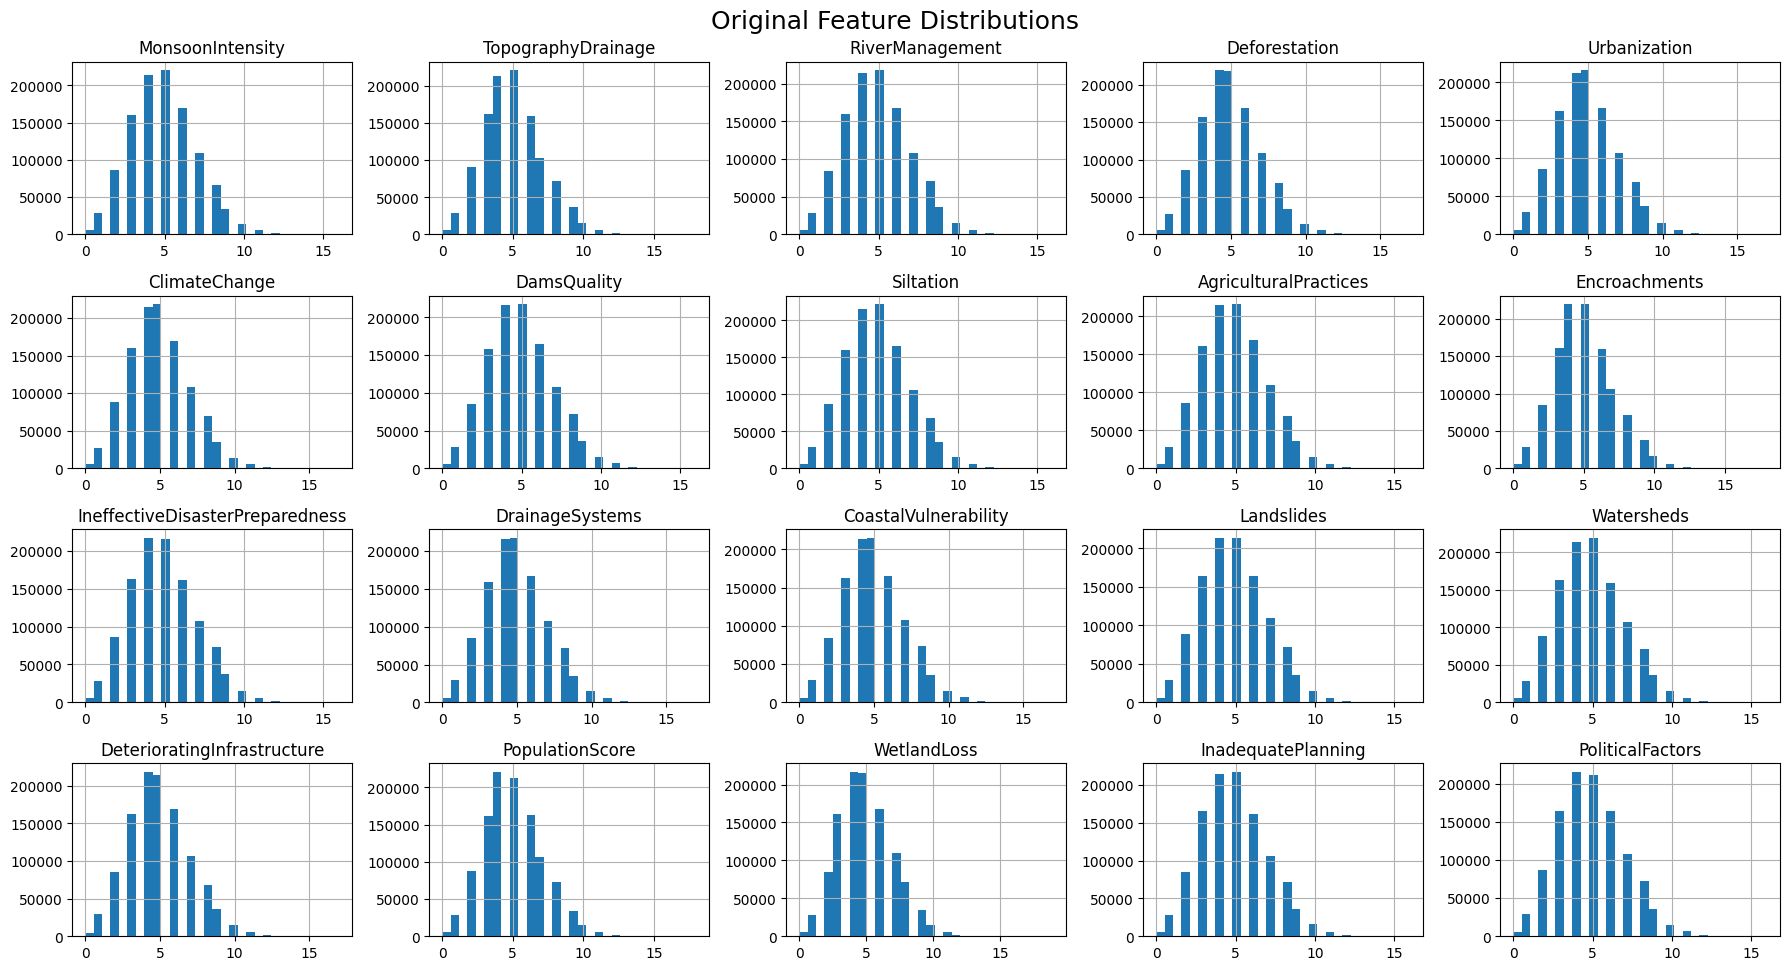

In [ ]:
X_orig = train.drop(columns=['id', 'FloodProbability'])
X_orig.hist(bins=30, figsize=(18, 12), layout=(5, 5))
plt.suptitle("Original Feature Distributions", fontsize=18)
plt.tight_layout()
plt.show()

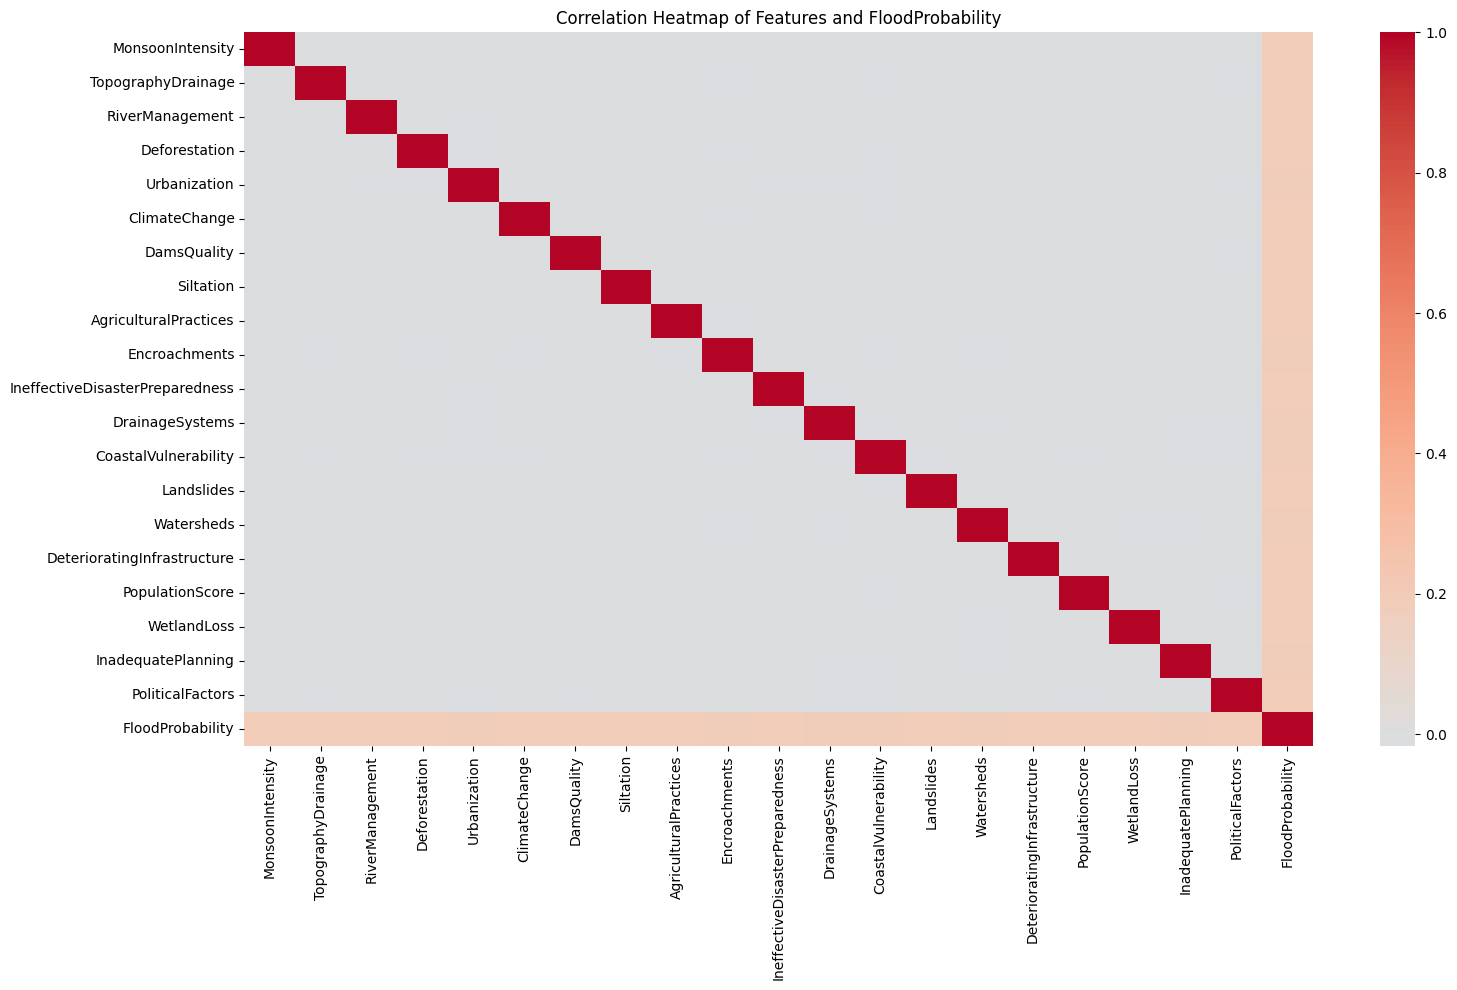

In [ ]:
plt.figure(figsize=(16, 10))
corr_matrix = train.drop(columns=['id']).corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Features and FloodProbability")
plt.tight_layout()
plt.show()